In [1]:
%matplotlib widget

import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from utils import load_pickle_data

In [2]:
obj_image_input = '../object_mapping/data/pole_input.csv'
input_df = pd.read_csv(obj_image_input, usecols=['imageBaseName'], dtype=str)
input_df['imageBaseName'] = input_df['imageBaseName'].str[:-1] + '1'
input_df.drop_duplicates(subset=['imageBaseName'], inplace=True)
print(f'input df shape after removing duplicates: {input_df.shape}')
image_list = input_df['imageBaseName'].tolist()
print(image_list)

input df shape after removing duplicates: (104, 1)
['926005420141', '926005420241', '926005421051', '926005421151', '926005421251', '926005422061', '926005422161', '926005424081', '926005424181', '926005424281', '926005425091', '926005425191', '926005426001', '926005426101', '926005426201', '926005427011', '926005427111', '926005427211', '926005428011', '926005428121', '926005428221', '926005430031', '926005430141', '926005430241', '926005431041', '926005431151', '926005431251', '926005432261', '926005433071', '926005434181', '926005434281', '926005435091', '926005435191', '926005435291', '926005436091', '926005438221', '926005444181', '926005445081', '926005445181', '926005445291', '926005446091', '926005446191', '926005447211', '926005452151', '926005452251', '926005453061', '926005458001', '926005458111', '926005458211', '926005459021', '926005459121', '926005459221', '926005500021', '926005500131', '926005500231', '926005501031', '926005501141', '926005501241', '926005502051', '926

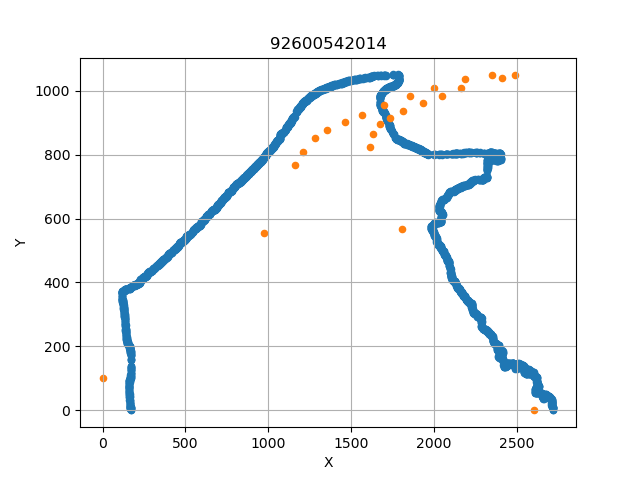

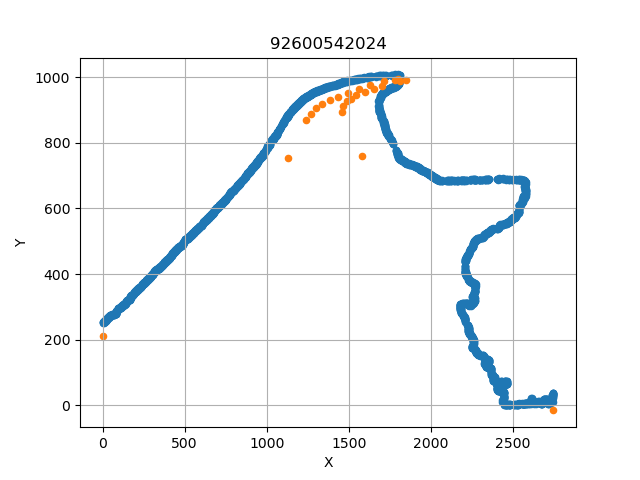

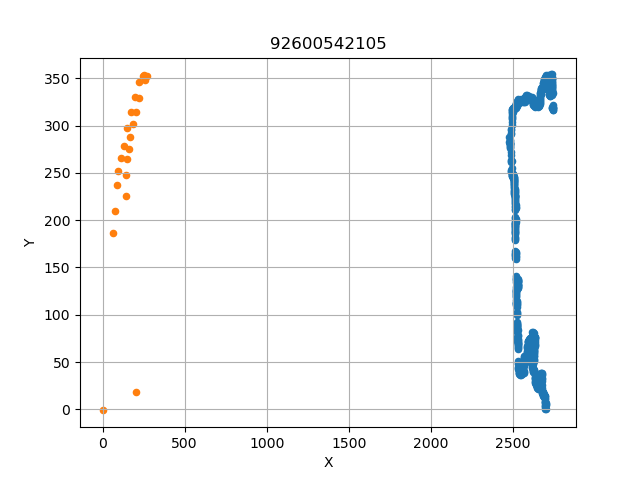

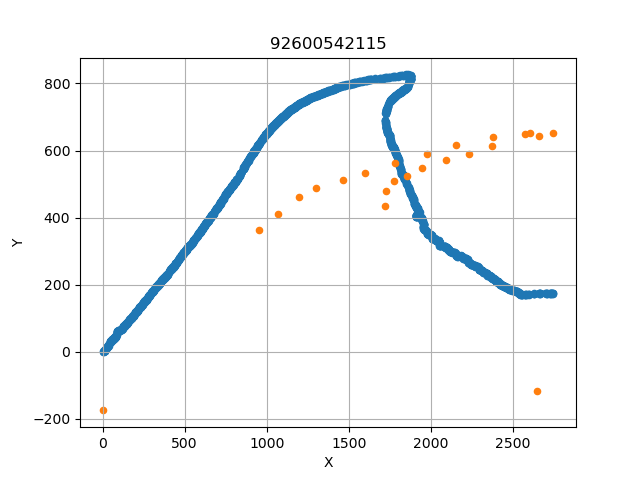

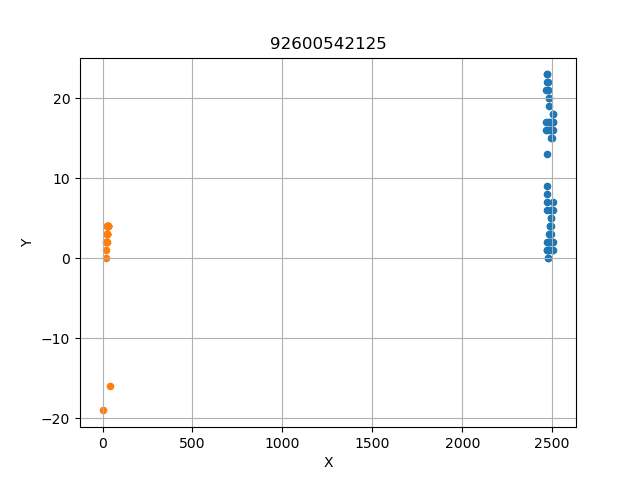

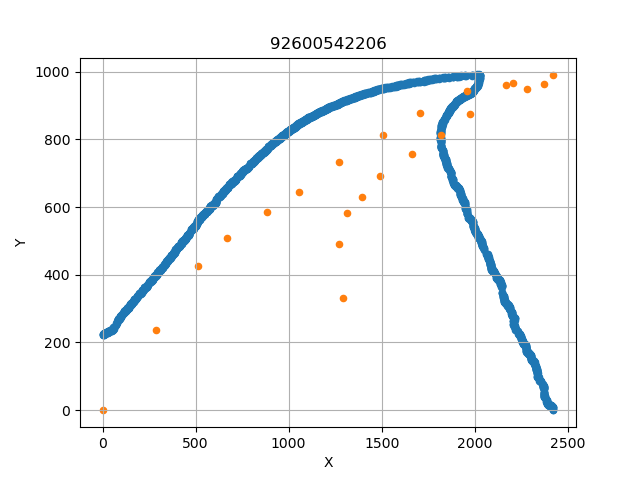

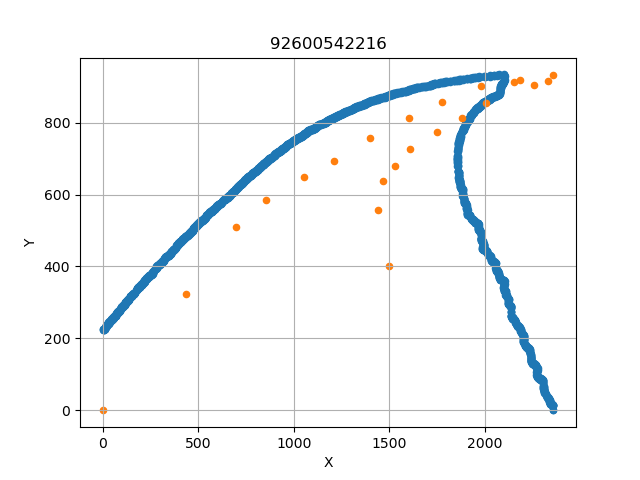

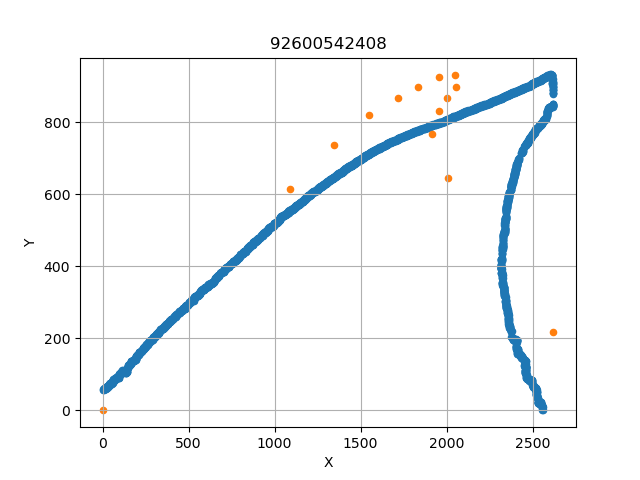

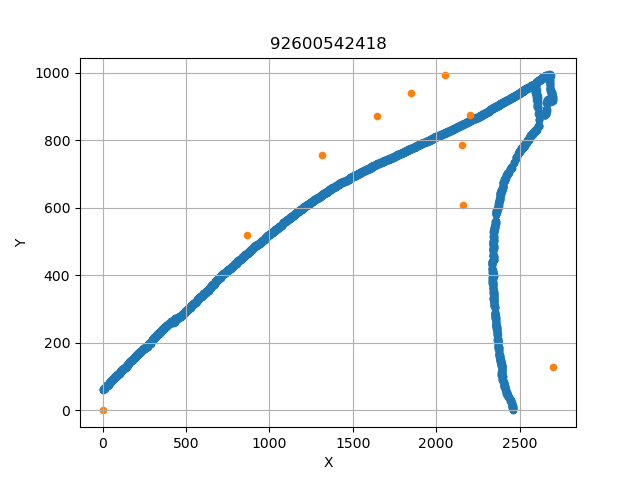

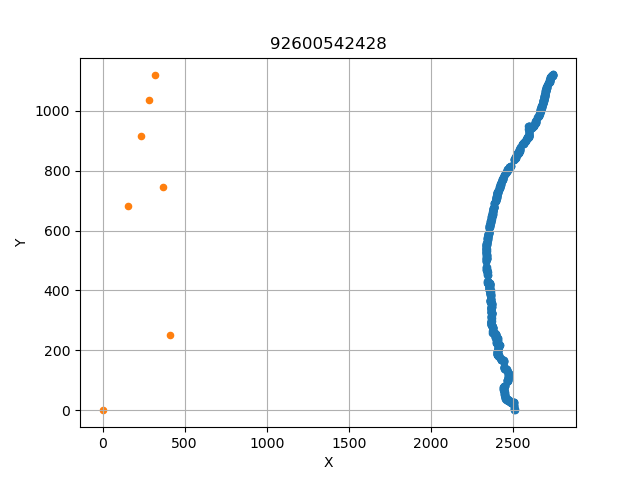

In [3]:
data_path = 'data/d13_route_40001001011/oneformer/output/route_batch/'
i = 0
while i < 10:
    filename = image_list[i]
    img_basename = filename[:-1]
    img_path = os.path.join(data_path, f'input_2d_{img_basename}.pkl')    
    input_3d_proj = os.path.join(data_path, f'lidar_project_info_{filename}.csv')
    input_2d_points = load_pickle_data(img_path)
    max_2d = np.amax(input_2d_points, axis=0)
    min_2d = np.amin(input_2d_points, axis=0)
    fig, ax = plt.subplots()
    input_3d_proj_df = pd.read_csv(input_3d_proj, usecols=['PROJ_SCREEN_X', 'PROJ_SCREEN_Y'], dtype=int)
    ax.scatter(input_2d_points[:, 0], max_2d[1] - input_2d_points[:, 1], s=20)
    ax.scatter(input_3d_proj_df['PROJ_SCREEN_X'], max_2d[1] - input_3d_proj_df['PROJ_SCREEN_Y'], s=20)
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    ax.set_title(img_basename)
    plt.grid(True)
    i += 1
    plt.show()